In [126]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# 准备数据
r_real = pd.concat([
    pd.DataFrame(
        np.array([random.randint(0, 1) for i in range(100)]).reshape(20, 5),
        columns=["O", "C", "E", "A", "N"]),
    pd.DataFrame([], columns=["I"])
])
r_real["I"] = [i for i in range(20)]
r_pre = pd.concat([
    pd.DataFrame(
        np.array([random.random() for i in range(1000)]).reshape(200, 5),
        columns=["O", "C", "E", "A", "N"]),
    pd.DataFrame([], columns=["I"])
])
def tran(x):
    if x > 0.6:
        return 1.0
    elif x < 0.4:
        return 0.0
    else:
        return np.nan # 看心情 0.5 还是 np.nan 吧
r_pre = r_pre.applymap(tran)
r_pre["I"] = [i for i in range(20)] * 10

In [127]:
# cd plan1
# 不合并，直接求
res = []
for i, row in r_pre.iterrows():
    for v in r_pre.columns[:-1]:
        res.append(1 if row[v] == r_real[v][row["I"]] else 0)
pd.DataFrame(np.array(res).reshape(int(len(res) / 5),5), columns=r_pre.columns[:-1])["O"].mean()

0.395

In [128]:
# both plan2
# 合并，不转求平均
r_pre_1 = r_pre.groupby(by=["I"]).mean()
r_real_1 = r_real.groupby(by=["I"]).mean()

print("O", end="\t")
print(1 - np.sum(
    [abs(r_real_1["O"][i] - r_pre_1["O"][i]) for i in r_pre_1.index]
) / r_pre_1.shape[0])

O	0.4893849206349207


In [129]:
# cx plan1
# 合并，转值，然后求准确率
def tran2(x):
    if x == 0.5 or np.isnan(x):
        return 0.5
    elif x > 0.5:
        return 1
    else:
        return 0
r_pre_2 = r_pre.applymap(lambda x: 0.5 if np.isnan(x) else x).groupby(by=["I"]).mean().applymap(tran2)
r_real_2 = r_real.groupby(by=["I"]).mean()

res = []
for i in r_pre_2.index:
    for v in r_pre_2.columns:
        res.append(1 if r_pre_2[v][i] == r_real_2[v][i] else 0)
pd.DataFrame(np.array(res).reshape(int(len(res) / 5),5), columns=r_pre_2.columns)["O"].mean()

0.5

In [130]:
def step():
    r_real = pd.concat([
        pd.DataFrame(
            np.array([random.randint(0, 1) for i in range(100)]).reshape(20, 5),
            columns=["O", "C", "E", "A", "N"]),
        pd.DataFrame([], columns=["I"])
    ])
    r_real["I"] = [i for i in range(20)]
    r_pre = pd.concat([
        pd.DataFrame(
            np.array([random.random() for i in range(1000)]).reshape(200, 5),
            columns=["O", "C", "E", "A", "N"]),
        pd.DataFrame([], columns=["I"])
    ])

    def tran(x):
        if x > 0.6:
            return 1.0
        elif x < 0.4:
            return 0.0
        else:
            return np.nan  # 看心情 0.5 还是 np.nan 吧

    r_pre = r_pre.applymap(tran)
    r_pre["I"] = [i for i in range(20)] * 10
    def plan1():
        res = []
        for i, row in r_pre.iterrows():
            for v in r_pre.columns[:-1]:
                res.append(1 if row[v] == r_real[v][row["I"]] else 0)
        return pd.DataFrame(np.array(res).reshape(int(len(res) / 5),5), columns=r_pre.columns[:-1])["O"].mean()
    def plan2():
        r_pre_1 = r_pre.groupby(by=["I"]).mean()
        r_real_1 = r_real.groupby(by=["I"]).mean()
        return 1 - np.sum(
            [abs(r_real_1["O"][i] - r_pre_1["O"][i]) for i in r_pre_1.index]
        ) / r_pre_1.shape[0]
    def plan3():
        def tran2(x):
            if x == 0.5 or np.isnan(x):
                return 0.5
            elif x > 0.5:
                return 1
            else:
                return 0
        r_pre_2 = r_pre.applymap(lambda x: 0.5 if np.isnan(x) else x).groupby(by=["I"]).mean().applymap(tran2)
        r_real_2 = r_real.groupby(by=["I"]).mean()

        res = []
        for i in r_pre_2.index:
            for v in r_pre_2.columns:
                res.append(1 if r_pre_2[v][i] == r_real_2[v][i] else 0)
        return pd.DataFrame(np.array(res).reshape(int(len(res) / 5),5), columns=r_pre_2.columns)["O"].mean()
    return (plan1(), plan2(), plan3())

step()


(0.365, 0.4863492063492063, 0.35)

In [132]:
res = []
n = 1000
for i in range(n):
    res.append(step())
df = pd.DataFrame(np.array(res).reshape(len(res) * 3, 1), columns=["value"])
df["in"] = ["p1", "p2", "p3"] * n
df.head()

,value,in
0,0.375000,p1
1,0.501746,p2
2,0.400000,p3
3,0.420000,p1
4,0.525278,p2


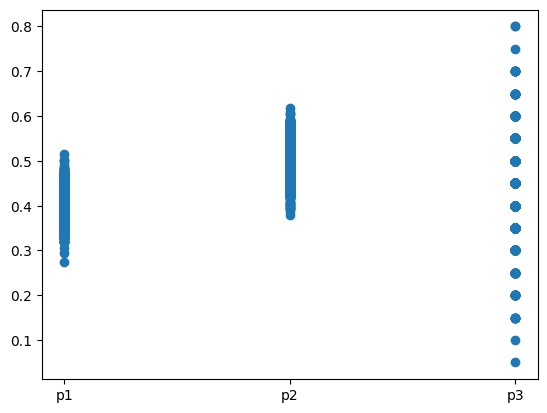

In [135]:
plt.scatter(df["in"], df["value"])